IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet.plot import plot_plotly,plot_components_plotly
import prophet
from prophet import Prophet
import matplotlib.pyplot as plt

IMPORT DATA

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kala/Sale.CSV', encoding='unicode_escape')

<ipython-input-2-03d685bd6ac4>:1: DtypeWarning: Columns (0,30,31,32,36,37,38,39,40,41,42,43,44,45,46,55,59,60,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kala/Sale.CSV', encoding='unicode_escape')


EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42818 entries, 0 to 42817
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BillingType                         29107 non-null  object 
 1   SO Type                             42818 non-null  object 
 2   Invoice no                          42818 non-null  int64  
 3   ODN No.                             42818 non-null  object 
 4   Invoice date                        42818 non-null  object 
 5   Gate pass no                        42717 non-null  float64
 6   Gate Pass date                      42717 non-null  object 
 7   Courier Docket No                   42717 non-null  object 
 8   Courier Name                        42706 non-null  object 
 9   SO No                               42818 non-null  int64  
 10  SO Item                             42818 non-null  int64  
 11  SO Creation Date                    42818

In [ ]:
#columns filter
reqd_sales = data[['Invoice date','Net Unit Price','Invoice Qty','Product Group','Sales Zone']]

In [ ]:
reqd_sales.head(5)

,Invoice date,Net Unit Price,Invoice Qty,Product Group,Sales Zone
0,02.05.2023,148.95,2,10TA,West Zone
1,02.05.2023,4188.15,1,10BC,West Zone
2,02.05.2023,195.30,10,10TA,West Zone
3,02.05.2023,136.00,500,10TA,South Zone
4,02.05.2023,3741.00,3,10EM,North Zone


<Axes: xlabel='Sales Zone', ylabel='Product Group'>

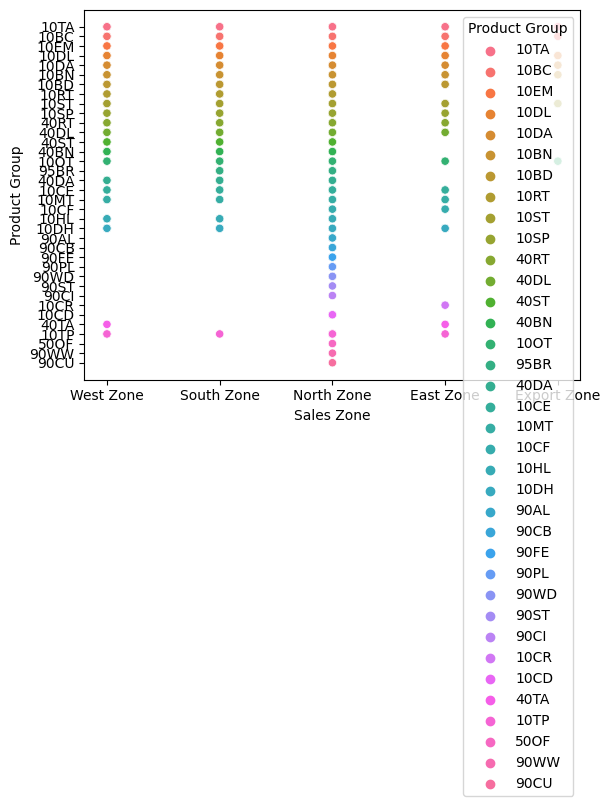

In [ ]:
#scatterplot - to check the zones that sells most products
sns.scatterplot(data=reqd_sales,x='Sales Zone',y='Product Group',hue = 'Product Group')

In [ ]:
reqd_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42818 entries, 0 to 42817
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Invoice date    42818 non-null  object 
 1   Net Unit Price  42818 non-null  float64
 2   Invoice Qty     42818 non-null  int64  
 3   Product Group   42818 non-null  object 
 4   Sales Zone      42814 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
reqd_sales.sample(10)

,Invoice date,Net Unit Price,Invoice Qty,Product Group,Sales Zone
40838,23.03.2023,356.00,200,10TA,East Zone
16901,15.04.2023,2295.16,10,10BN,North Zone
32020,14.02.2023,95452.00,1,10BD,North Zone
1787,17.04.2023,1817.00,24,40DL,East Zone
17940,22.04.2023,2864.26,17,10BN,West Zone
24449,15.06.2023,3088.23,5,10BN,West Zone
22726,26.07.2023,200.00,10,10SP,South Zone
42313,28.03.2023,338.00,20,10TA,North Zone
33376,20.02.2023,141.00,150,10TA,North Zone
27724,21.05.2023,5139.75,1,10ST,North Zone


<Axes: xlabel='Product Group', ylabel='Sales Zone'>

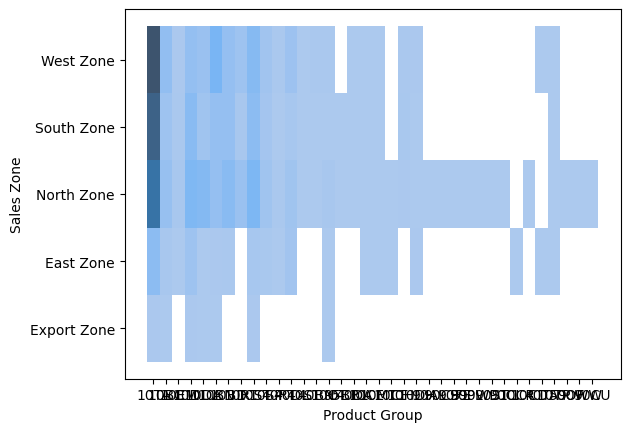

In [ ]:
sns.histplot(data=reqd_sales,x='Product Group',y='Sales Zone')

In [ ]:
#converting to datetime format
reqd_sales['Date'] = pd.to_datetime(reqd_sales['Invoice date'],dayfirst=True)
#reqd_sales['Date'] = reqd_sales['Invoice date'].dt.strftime('%Y/%m/%d')

<ipython-input-6-744c063e9f8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reqd_sales['Date'] = pd.to_datetime(reqd_sales['Invoice date'],dayfirst=True)


In [ ]:
reqd_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42818 entries, 0 to 42817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Invoice date    42818 non-null  datetime64[ns]
 1   Net Unit Price  42818 non-null  float64       
 2   Invoice Qty     42818 non-null  int64         
 3   Product Group   42818 non-null  object        
 4   Sales Zone      42814 non-null  object        
 5   Date            42818 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
#dimensionality reduction
reqd_sales['Sales'] = reqd_sales['Invoice Qty']*reqd_sales['Net Unit Price']

<ipython-input-7-5cee29db8a71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reqd_sales['Sales'] = reqd_sales['Invoice Qty']*reqd_sales['Net Unit Price']


In [ ]:
reqd_sales.head(5)

,Invoice date,Net Unit Price,Invoice Qty,Product Group,Sales Zone,Date,Sales
0,2023-05-02,148.95,2,10TA,West Zone,2023/05/02,297.90
1,2023-05-02,4188.15,1,10BC,West Zone,2023/05/02,4188.15
2,2023-05-02,195.30,10,10TA,West Zone,2023/05/02,1953.00
3,2023-05-02,136.00,500,10TA,South Zone,2023/05/02,68000.00
4,2023-05-02,3741.00,3,10EM,North Zone,2023/05/02,11223.00


<ipython-input-72-249b7e367f00>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='Product Group'>

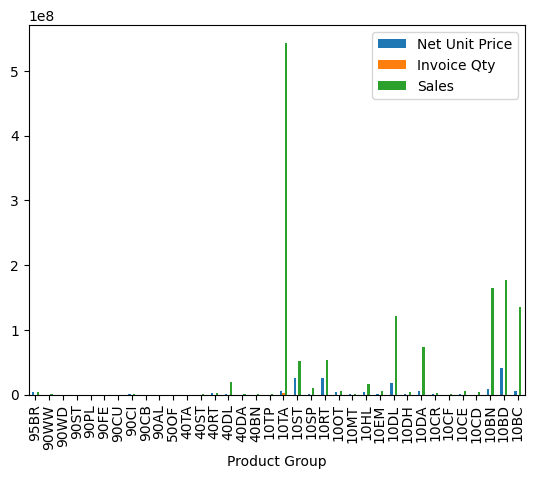

In [ ]:
#check the sales of different product
reqd_sales.groupby('Product Group').sum().sort_values(ascending =False,by = 'Product Group').plot(kind='bar')

In [ ]:
#sorting wrt dates
reqd_sales = reqd_sales.sort_values(ascending=True,by='Invoice date')
reqd_sales.head(10)

,Invoice date,Net Unit Price,Invoice Qty,Product Group,Sales Zone,Date,Sales
29249,2023-02-01,3652.0,2,10DA,North Zone,2023/02/01,7304.0
29224,2023-02-01,188.0,120,10TA,North Zone,2023/02/01,22560.0
29223,2023-02-01,94.0,10,10SP,North Zone,2023/02/01,940.0
29222,2023-02-01,145.0,30,10SP,North Zone,2023/02/01,4350.0
29221,2023-02-01,855.0,200,10TA,West Zone,2023/02/01,171000.0
29220,2023-02-01,7468.0,1,10ST,South Zone,2023/02/01,7468.0
29219,2023-02-01,3420.0,17,10DA,North Zone,2023/02/01,58140.0
29218,2023-02-01,4120.0,2,10DA,North Zone,2023/02/01,8240.0
29225,2023-02-01,219.0,300,10TA,North Zone,2023/02/01,65700.0
29217,2023-02-01,3708.0,3,10DL,North Zone,2023/02/01,11124.0


<Axes: xlabel='Sales Zone', ylabel='Sales'>

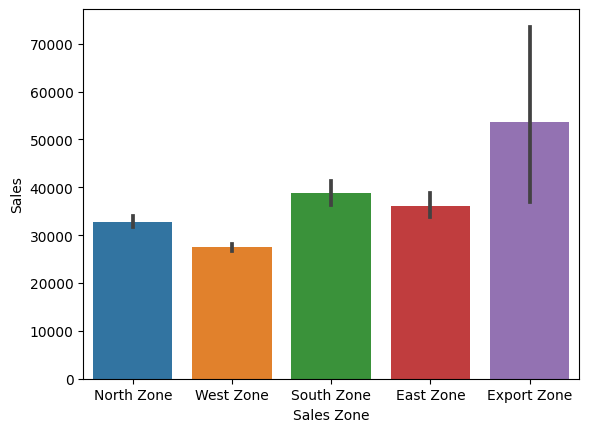

In [ ]:
#check the sales zonewise
sns.barplot(data=reqd_sales,x='Sales Zone',y='Sales')

In [ ]:
reqd_sales['Sales'].astype(float)

29249      7304.0
29224     22560.0
29223       940.0
29222      4350.0
29221    171000.0
           ...   
23821     35362.5
23822     65962.0
23823     59850.0
23817     19050.0
23725     14500.0
Name: Sales, Length: 42818, dtype: float64

In [ ]:
#filtering columns
final_sales = reqd_sales[['Date','Product Group','Sales Zone','Sales']]

In [ ]:
final_sales.sample(5)

,Date,Product Group,Sales Zone,Sales
11748,2023/07/01,10BN,West Zone,108672.0
5023,2023/05/22,10TA,East Zone,27580.0
32998,2023/02/18,10TA,South Zone,400.0
32996,2023/02/18,10TA,South Zone,450.0
5415,2023/05/24,10BN,North Zone,58695.0


<ipython-input-78-02ef61aad0fc>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



array([<Axes: ylabel='Sales'>], dtype=object)

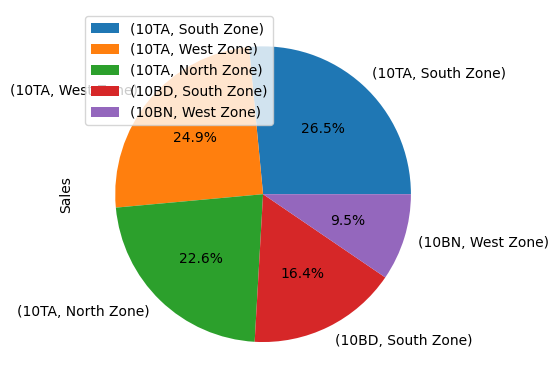

In [ ]:
#top 3 products and details pie chart
final_sales.groupby(['Product Group','Sales Zone']).sum().sort_values(ascending=False,by='Sales').head(5).plot(kind='pie',subplots=True,autopct='%1.1f%%')

In [ ]:
final_sales['Product Group'].unique()

array(['10DA', '10TA', '10SP', '10ST', '10DL', '10RT', '10BN', '40DL',
       '10CD', '10BC', '40ST', '10DH', '40RT', '10BD', '10EM', '10CE',
       '10HL', '10OT', '10MT', '40BN', '10TP', '40DA', '10CF', '90AL',
       '90CB', '90FE', '90PL', '90WD', '10CR', '90ST', '90CI', '95BR',
       '40TA', '50OF', '90WW', '90CU'], dtype=object)

**10TA FORECASTING**

In [ ]:
#taking sales of a single product 10TA
sales_10TA = final_sales[final_sales['Product Group']=='10TA'].drop(['Sales Zone','Product Group'],axis=1)
sales_10TA.head(5)


,Date,Sales
0,2023-05-02,297.9
2,2023-05-02,1953.0
3,2023-05-02,68000.0
8,2023-05-03,93600.0
12,2023-05-03,22950.0


In [ ]:
#adding the sales of the same date
sales_10TA = sales_10TA.groupby('Date').sum()
sales_10TA.head(5)

,Sales
Date,
2023-02-01,3421222.0
2023-02-02,4699037.0
2023-02-03,5258516.0
2023-02-04,5611662.0
2023-02-06,5294307.0


In [ ]:
sales_10TA_freq = sales_10TA.asfreq('d')

In [ ]:
sales_10TA_freq.isna().sum()

Sales    27
dtype: int64

In [ ]:
sales_10TA_freq.Sales = sales_10TA_freq.Sales.fillna(method='ffill')

In [ ]:
sales_10TA_freq['Date'] = sales_10TA_freq.index
sales_10TA_freq = sales_10TA_freq.reset_index(drop=True)
sales_10TA_freq.head(5)

,Sales,Date
0,3421222.0,2023-02-01
1,4699037.0,2023-02-02
2,5258516.0,2023-02-03
3,5611662.0,2023-02-04
4,5611662.0,2023-02-05


In [ ]:
sales_10TA_freq.columns=['y','ds']

In [ ]:
#splitting data into train and test
train = sales_10TA_freq.iloc[:-30]
test = sales_10TA_freq.iloc[-30:]
test

,y,ds
151,3488119.29,2023-07-02
152,4074304.63,2023-07-03
153,4696005.74,2023-07-04
154,4926906.72,2023-07-05
155,5119333.42,2023-07-06
156,4256202.94,2023-07-07
157,2690052.98,2023-07-08
158,2690052.98,2023-07-09
159,4002909.59,2023-07-10
160,3676393.41,2023-07-11


from matplotlib import pyplot as plt
test['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
plt.ylabel('y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
plt.ylabel('count()')

from matplotlib import pyplot as plt
test['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

In [ ]:
#calling the model
m = Prophet()

In [ ]:
#fit model
model = m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrbr2x6a/534198qa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrbr2x6a/rkwbo7rj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52091', 'data', 'file=/tmp/tmpzrbr2x6a/534198qa.json', 'init=/tmp/tmpzrbr2x6a/rkwbo7rj.json', 'output', 'file=/tmp/tmpzrbr2x6a/prophet_modeli1i61nvg/prophet_model-20231026104511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:45:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#prediction
future = m.make_future_dataframe(periods=30,freq='M')
forecast = m.predict(future)
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151,2023-07-31,3.468283e+06,1.967003e+06,6.035518e+06,3.468272e+06,3.468293e+06,412239.635560,412239.635560,412239.635560,412239.635560,412239.635560,412239.635560,0.0,0.0,0.0,3.880523e+06
152,2023-08-31,3.469484e+06,1.415119e+06,5.487046e+06,3.469447e+06,3.469516e+06,-21465.414734,-21465.414734,-21465.414734,-21465.414734,-21465.414734,-21465.414734,0.0,0.0,0.0,3.448019e+06
153,2023-09-30,3.470646e+06,1.502401e+06,5.405846e+06,3.470575e+06,3.470711e+06,-28456.650061,-28456.650061,-28456.650061,-28456.650061,-28456.650061,-28456.650061,0.0,0.0,0.0,3.442189e+06
154,2023-10-31,3.471847e+06,1.530278e+06,5.590208e+06,3.471740e+06,3.471951e+06,11211.628449,11211.628449,11211.628449,11211.628449,11211.628449,11211.628449,0.0,0.0,0.0,3.483059e+06
155,2023-11-30,3.473009e+06,1.422618e+06,5.669175e+06,3.472856e+06,3.473157e+06,-21465.414734,-21465.414734,-21465.414734,-21465.414734,-21465.414734,-21465.414734,0.0,0.0,0.0,3.451544e+06
156,2023-12-31,3.474210e+06,1.347827e+06,5.220258e+06,3.474014e+06,3.474409e+06,-227926.879125,-227926.879125,-227926.879125,-227926.879125,-227926.879125,-227926.879125,0.0,0.0,0.0,3.246283e+06
157,2024-01-31,3.475411e+06,1.323353e+06,5.591766e+06,3.475164e+06,3.475667e+06,57449.722187,57449.722187,57449.722187,57449.722187,57449.722187,57449.722187,0.0,0.0,0.0,3.532860e+06
158,2024-02-29,3.476534e+06,1.409308e+06,5.399372e+06,3.476230e+06,3.476842e+06,-21465.414733,-21465.414733,-21465.414733,-21465.414733,-21465.414733,-21465.414733,0.0,0.0,0.0,3.455069e+06
159,2024-03-31,3.477735e+06,1.138738e+06,5.282606e+06,3.477375e+06,3.478106e+06,-227926.879125,-227926.879125,-227926.879125,-227926.879125,-227926.879125,-227926.879125,0.0,0.0,0.0,3.249808e+06
160,2024-04-30,3.478897e+06,1.427564e+06,5.443288e+06,3.478473e+06,3.479324e+06,11211.628450,11211.628450,11211.628450,11211.628450,11211.628450,11211.628450,0.0,0.0,0.0,3.490109e+06


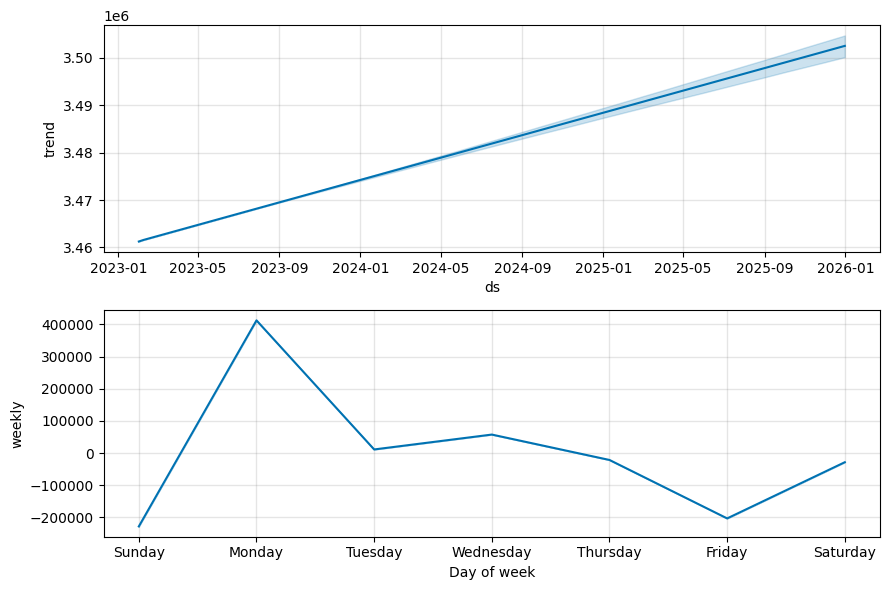

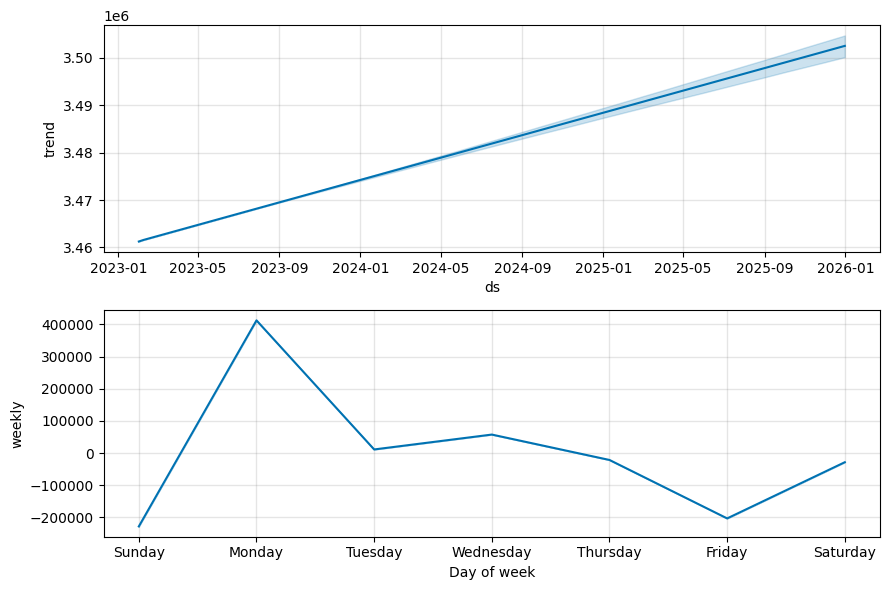

In [ ]:
#plot
model.plot_components(forecast)

In [ ]:
plot_plotly(m,forecast)

<Axes: >

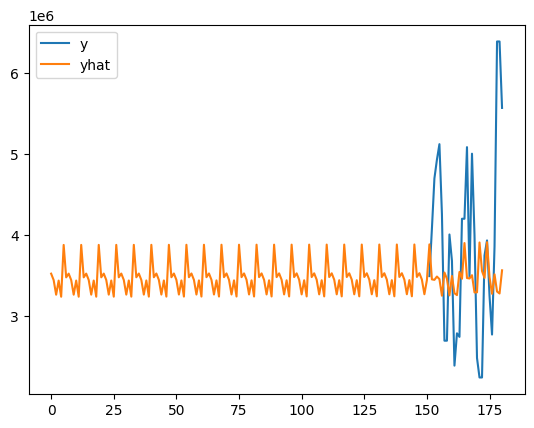

In [ ]:
#comparing predicted and test data
test['y'].plot(legend=True)
forecast['yhat'].plot(legend=True)

10BD FORECASTING

In [ ]:
sales_10BD = final_sales[final_sales['Product Group']=='10BD'].drop(['Sales Zone','Product Group'],axis=1)
sales_10BD

,SO Creation Date,Sales
33958,2022-04-27,4962.00
33711,2022-07-12,99848.00
35557,2022-11-10,31031.00
34695,2022-12-13,1282848.00
29990,2022-12-13,1097376.00
...,...,...
22835,2023-12-07,64296.55
14520,2023-12-07,4042.50
14411,2023-12-07,6397.06
14412,2023-12-07,6397.06


In [ ]:
sales_10BD = sales_10BD.groupby('SO Creation Date').sum()
sales_10BD['Date'] = sales_10BD.index
sales_10BD = sales_10BD.reset_index(drop=True)
sales_10BD.tail()

,Sales,Date
153,458409.62,2023-11-07
154,624669.44,2023-12-04
155,402298.26,2023-12-05
156,2424120.58,2023-12-06
157,87530.24,2023-12-07


In [ ]:
sales_10BD.columns=['y','ds']
sales_10BD

,y,ds
0,4962.00,2022-04-27
1,99848.00,2022-07-12
2,31031.00,2022-11-10
3,18316392.00,2022-12-13
4,22500.00,2022-12-24
...,...,...
153,458409.62,2023-11-07
154,624669.44,2023-12-04
155,402298.26,2023-12-05
156,2424120.58,2023-12-06


In [ ]:
m2=Prophet()

In [ ]:
model2 = m2.fit(sales_10BD)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqwj7ftu/4wh92n5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqwj7ftu/qpmo33vr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22869', 'data', 'file=/tmp/tmpbqwj7ftu/4wh92n5l.json', 'init=/tmp/tmpbqwj7ftu/qpmo33vr.json', 'output', 'file=/tmp/tmpbqwj7ftu/prophet_modelfsgtyyct/prophet_model-20231008070047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:00:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:00:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
futureBD = m2.make_future_dataframe(periods=30,freq='D')
forecastBD = m2.predict(futureBD)
forecastBD.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
183,2024-01-02,1.254471e+06,-2.716285e+06,1.001231e+07,1.254470e+06,1.254473e+06,2.413380e+06,2.413380e+06,2.413380e+06,2.413380e+06,2.413380e+06,2.413380e+06,0.0,0.0,0.0,3.667851e+06
184,2024-01-03,1.255496e+06,-5.434620e+06,7.282692e+06,1.255495e+06,1.255497e+06,-1.326462e+05,-1.326462e+05,-1.326462e+05,-1.326462e+05,-1.326462e+05,-1.326462e+05,0.0,0.0,0.0,1.122849e+06
185,2024-01-04,1.256520e+06,-5.678314e+06,7.194385e+06,1.256519e+06,1.256521e+06,-3.961178e+05,-3.961178e+05,-3.961178e+05,-3.961178e+05,-3.961178e+05,-3.961178e+05,0.0,0.0,0.0,8.604021e+05
186,2024-01-05,1.257544e+06,-6.222462e+06,7.348894e+06,1.257543e+06,1.257546e+06,-5.190039e+05,-5.190039e+05,-5.190039e+05,-5.190039e+05,-5.190039e+05,-5.190039e+05,0.0,0.0,0.0,7.385403e+05
187,2024-01-06,1.258568e+06,-5.344072e+06,8.068130e+06,1.258567e+06,1.258570e+06,-2.111685e+05,-2.111685e+05,-2.111685e+05,-2.111685e+05,-2.111685e+05,-2.111685e+05,0.0,0.0,0.0,1.047400e+06


In [ ]:
forecastBD = forecastBD[['yhat','ds']]
forecastBD['yhat'].astype(float)
pd.options.display.float_format = '{:.8f}'.format
forecastBD.tail(31)

,yhat,ds
157,831722.85786740,2023-12-07
158,709861.06250463,2023-12-08
159,1018720.72979480,2023-12-09
160,722247.60158362,2023-12-10
161,586160.58087305,2023-12-11
162,3646341.50800684,2023-12-12
163,1101340.02413070,2023-12-13
164,838892.66500481,2023-12-14
165,717030.86963563,2023-12-15
166,1025890.53692743,2023-12-16


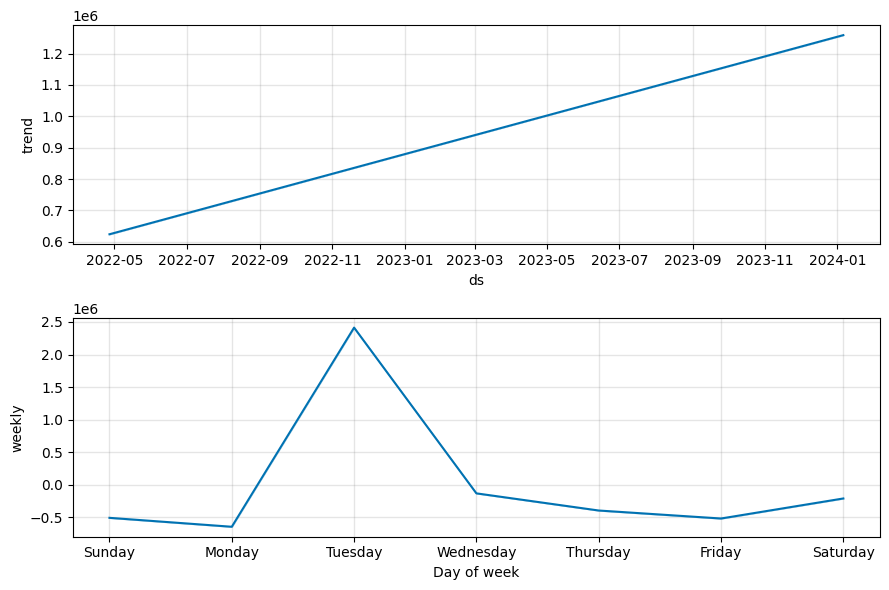

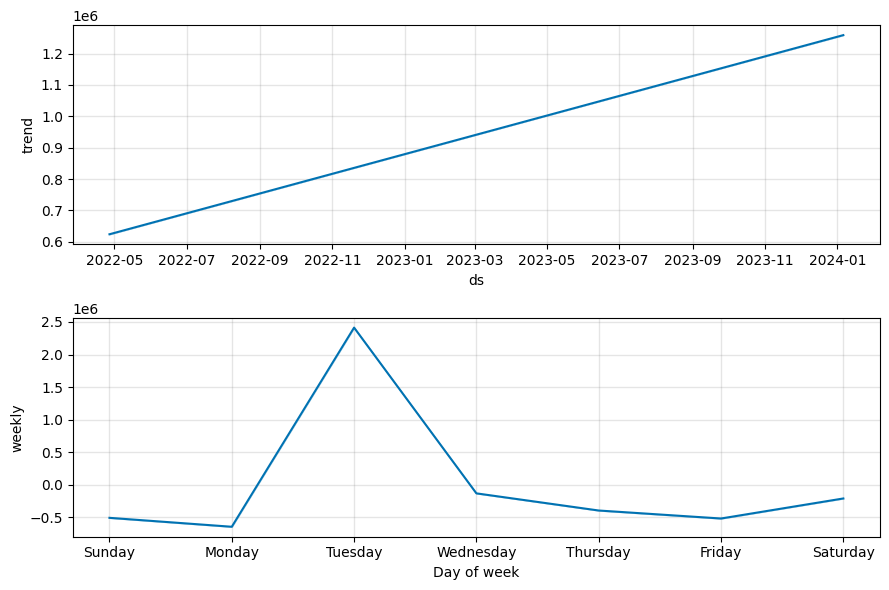

In [ ]:
model2.plot_components(forecastBD)

In [ ]:
plot_plotly(m2,forecastBD)

10BN FORECASTING

In [ ]:
sales_10BN = final_sales[final_sales['Product Group']=='10BN'].drop(['Sales Zone','Product Group'],axis=1)
sales_10BN

,SO Creation Date,Sales
36153,2022-01-12,26500.00
32290,2022-01-12,26500.00
41847,2022-01-12,26500.00
29525,2022-01-12,104000.00
29984,2022-01-12,26500.00
...,...,...
14524,2023-12-07,32000.00
14534,2023-12-07,38556.30
28756,2023-12-07,160534.00
28764,2023-12-07,1328.75


In [ ]:
sales_10BN = sales_10BN.groupby('SO Creation Date').sum()
sales_10BN['Date'] = sales_10BN.index
sales_10BN = sales_10BN.reset_index(drop=True)
sales_10BN

,Sales,Date
0,236500.00,2022-01-12
1,336000.00,2022-02-08
2,323820.00,2022-05-11
3,237520.00,2022-06-12
4,1102112.00,2022-07-09
...,...,...
197,10969.00,2023-12-01
198,759364.15,2023-12-04
199,1510254.88,2023-12-05
200,1301712.88,2023-12-06


In [ ]:
sales_10BN.columns=['y','ds']
sales_10BN.tail(5)

,y,ds
197,10969.00,2023-12-01
198,759364.15,2023-12-04
199,1510254.88,2023-12-05
200,1301712.88,2023-12-06
201,1257180.05,2023-12-07


In [ ]:
m3=Prophet()

In [ ]:
model3 = m3.fit(sales_10BN)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqwj7ftu/agtt3yac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqwj7ftu/tixjh7rv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61393', 'data', 'file=/tmp/tmpbqwj7ftu/agtt3yac.json', 'init=/tmp/tmpbqwj7ftu/tixjh7rv.json', 'output', 'file=/tmp/tmpbqwj7ftu/prophet_model5qtyh7yl/prophet_model-20231008070333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:03:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:03:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
futureBN = m3.make_future_dataframe(periods=30,freq='D')
forecastBN = m3.predict(futureBN)
forecastBN.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
222,2023-12-28,1.076847e+06,-45966.329750,1.866855e+06,1.076847e+06,1.076847e+06,-166646.363444,-166646.363444,-166646.363444,-166646.363444,-166646.363444,-166646.363444,0.0,0.0,0.0,9.102006e+05
223,2023-12-29,1.077782e+06,35628.701895,1.862111e+06,1.077782e+06,1.077782e+06,-123810.947744,-123810.947744,-123810.947744,-123810.947744,-123810.947744,-123810.947744,0.0,0.0,0.0,9.539712e+05
224,2023-12-30,1.078717e+06,242974.160673,2.126332e+06,1.078717e+06,1.078717e+06,105076.360163,105076.360163,105076.360163,105076.360163,105076.360163,105076.360163,0.0,0.0,0.0,1.183794e+06
225,2023-12-31,1.079652e+06,450442.494575,2.342372e+06,1.079652e+06,1.079652e+06,330210.271648,330210.271648,330210.271648,330210.271648,330210.271648,330210.271648,0.0,0.0,0.0,1.409863e+06
226,2024-01-01,1.080588e+06,37844.267619,1.927194e+06,1.080588e+06,1.080588e+06,-108761.548265,-108761.548265,-108761.548265,-108761.548265,-108761.548265,-108761.548265,0.0,0.0,0.0,9.718261e+05
227,2024-01-02,1.081523e+06,190443.928600,2.027582e+06,1.081523e+06,1.081523e+06,48459.128206,48459.128206,48459.128206,48459.128206,48459.128206,48459.128206,0.0,0.0,0.0,1.129982e+06
228,2024-01-03,1.082458e+06,43883.934760,1.882274e+06,1.082458e+06,1.082458e+06,-84526.900565,-84526.900565,-84526.900565,-84526.900565,-84526.900565,-84526.900565,0.0,0.0,0.0,9.979311e+05
229,2024-01-04,1.083393e+06,37945.698033,1.878274e+06,1.083393e+06,1.083393e+06,-166646.363445,-166646.363445,-166646.363445,-166646.363445,-166646.363445,-166646.363445,0.0,0.0,0.0,9.167468e+05
230,2024-01-05,1.084328e+06,-47073.434213,1.822782e+06,1.084328e+06,1.084328e+06,-123810.947744,-123810.947744,-123810.947744,-123810.947744,-123810.947744,-123810.947744,0.0,0.0,0.0,9.605173e+05
231,2024-01-06,1.085263e+06,326683.328213,2.143734e+06,1.085263e+06,1.085263e+06,105076.360164,105076.360164,105076.360164,105076.360164,105076.360164,105076.360164,0.0,0.0,0.0,1.190340e+06


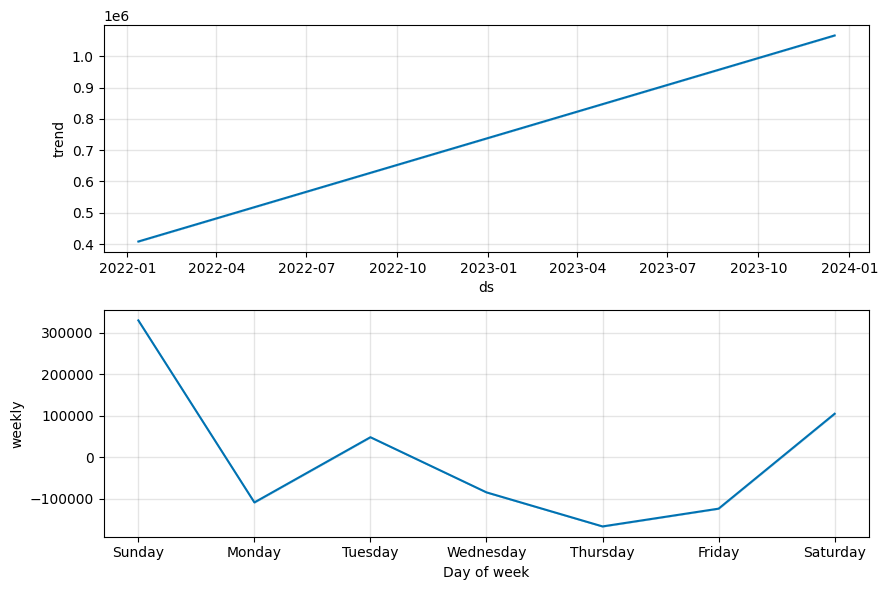

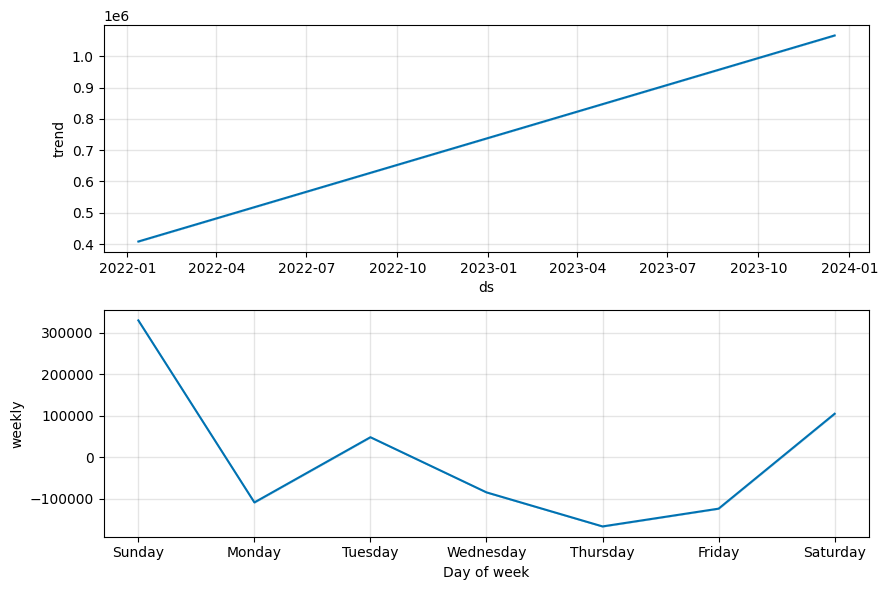

In [ ]:
model3.plot_components(forecastBN)

In [ ]:
plot_plotly(m3,forecastBN)